 # IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# IMPORTING DATA

In [3]:
df = pd.read_csv("C:/Users/HP/Downloads/archive (3)/UK_Online_Retail.csv",encoding="ISO-8859-1")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


#  INFORMATION OF DATA

In [3]:
print("Size of data: ",df.size)
print("**************")
print("Rows,Columns :",df.shape)
print("************")
print("Attributes  :",df.columns)
print("************")
print(df.info())

Size of data:  4335272
**************
Rows,Columns : (541909, 8)
************
Attributes  : Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')
************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


# MISSING VALUES

In [23]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# REMOVING CANCELLED ORDERS and MISSING CUSTOMER ID'S

In [4]:
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
print(df['InvoiceNo'])
print("*******")
df = df.dropna(subset=['CustomerID'])
df.shape

0         536365
1         536365
2         536365
3         536365
4         536365
           ...  
541904    581587
541905    581587
541906    581587
541907    581587
541908    581587
Name: InvoiceNo, Length: 532621, dtype: object
*******


(397924, 8)

In [5]:
#Adding New Column
df['TotalPrice'] = df['Quantity']*df['UnitPrice']


#Converting to DateTime Format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.to_period('M')
df['Date'] = df['InvoiceDate'].dt.date           
df[['InvoiceDate','Month','Date']].head(10)

,InvoiceDate,Month,Date
0,2010-12-01 08:26:00,2010-12,2010-12-01
1,2010-12-01 08:26:00,2010-12,2010-12-01
2,2010-12-01 08:26:00,2010-12,2010-12-01
3,2010-12-01 08:26:00,2010-12,2010-12-01
4,2010-12-01 08:26:00,2010-12,2010-12-01
5,2010-12-01 08:26:00,2010-12,2010-12-01
6,2010-12-01 08:26:00,2010-12,2010-12-01
7,2010-12-01 08:28:00,2010-12,2010-12-01
8,2010-12-01 08:28:00,2010-12,2010-12-01
9,2010-12-01 08:34:00,2010-12,2010-12-01


# CHECK FOR OUTLIERS

In [6]:
Q1 = df['UnitPrice'].quantile(0.25)
Q3 = df['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1           # INTER QUARTILE RANGE

# Defining bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing outliers
df = df[(df['UnitPrice'] >= lower_bound) & (df['UnitPrice'] <= upper_bound)]
df.shape

(363568, 11)

In [6]:
df['UnitPrice'].describe()

count    363568.000000
mean          2.134663
std           1.534838
min           0.000000
25%           0.850000
50%           1.650000
75%           2.950000
max           7.500000
Name: UnitPrice, dtype: float64

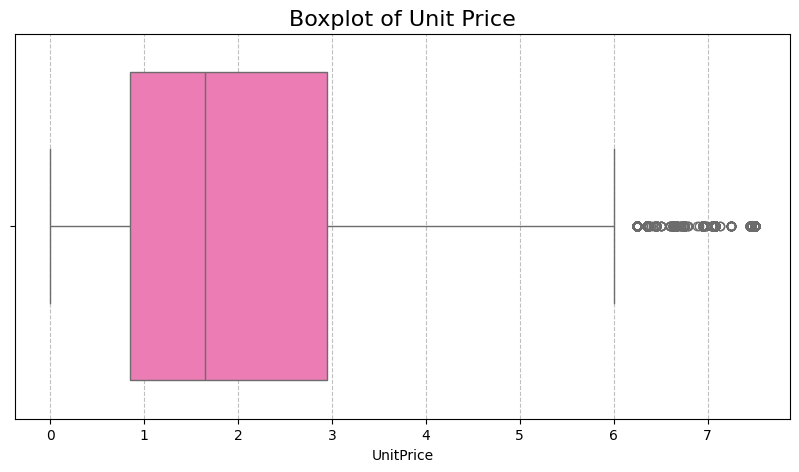

In [93]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['UnitPrice'],color='hotpink') 
plt.title('Boxplot of Unit Price', fontsize=16)
plt.xlabel('UnitPrice')
plt.grid(axis='x', linestyle='--', alpha=0.8)
plt.show()


# REVENUE GENERATED BY TOP COUNTRIES

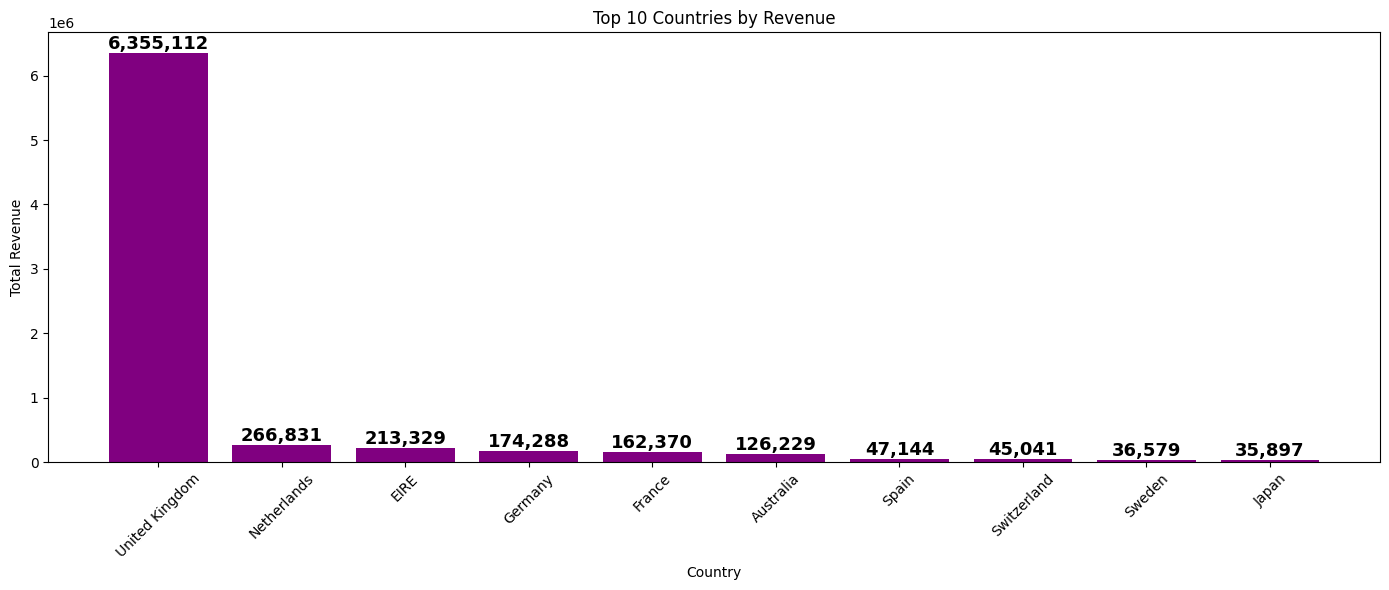

In [15]:
topcountries = df.groupby('Country')['TotalPrice'].sum()
top_c = topcountries.sort_values(ascending=False).head(10)


#GRAPH
plt.figure(figsize=(14,6))
bars = plt.bar(data=df,x=top_c.index,height=top_c.values,color="purple")
plt.title('Top 10 Countries by Revenue')
plt.ylabel('Total Revenue')
plt.xlabel('Country')
plt.xticks(rotation=45)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,height,
             f'{height:,.0f}',
             ha='center',va='bottom',fontsize=13,fontweight='bold')

plt.tight_layout()
plt.show()
             

# MONTHLY SALES TREND

<function matplotlib.pyplot.show(close=None, block=None)>

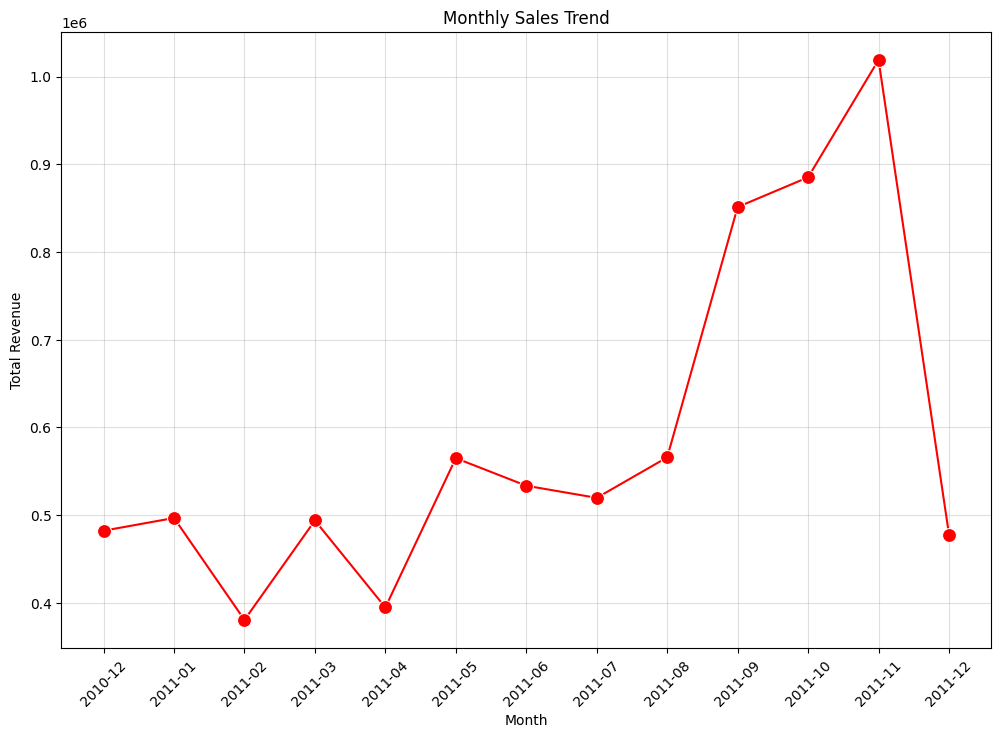

In [88]:
Monthly_Sales = df.groupby("Month")['TotalPrice'].sum()
#print(Monthly_Sales.head(15))

#GRAPH
plt.figure(figsize=(12,8))
sns.lineplot(x=Monthly_Sales.index.astype(str),y=Monthly_Sales.values,marker="o",markersize=10,color='red')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True,alpha=0.4)
plt.show

# TOP CUSTOMERS BY REVENUE VS QUANTITY

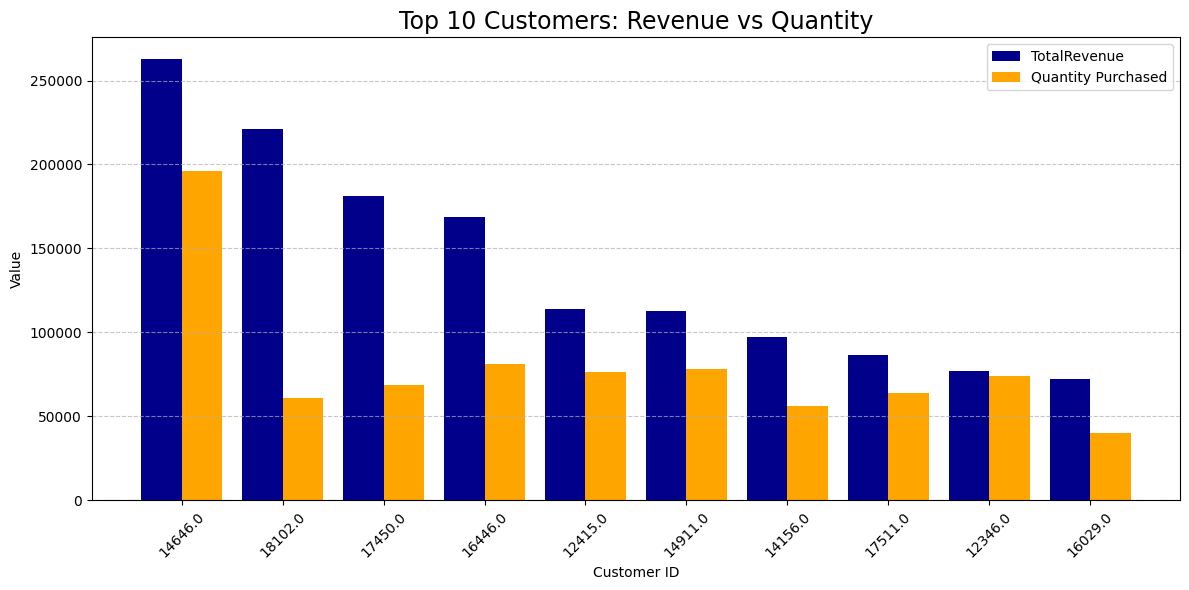

In [89]:
cust_metrics = df.groupby('CustomerID')[['TotalPrice','Quantity']].sum()
top_cust = cust_metrics.sort_values('TotalPrice',ascending=False).head(10)

#GRAPH 
x = np.arange(len(top_cust))
width = 0.4

plt.figure(figsize=(12,6))
plt.bar(x - width/2,top_cust['TotalPrice'],width,label='TotalRevenue',color='darkblue')
plt.bar(x + width/2,top_cust['Quantity'],width,label='Quantity Purchased',color='orange')
plt.xlabel('Customer ID')
plt.ylabel('Value')
plt.title('Top 10 Customers: Revenue vs Quantity',fontsize=17)
plt.xticks(x,top_cust.index.astype(str),rotation=45)
plt.legend()
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()



# PRODUCTS: QUANTITY VS TOTAL REVENUE

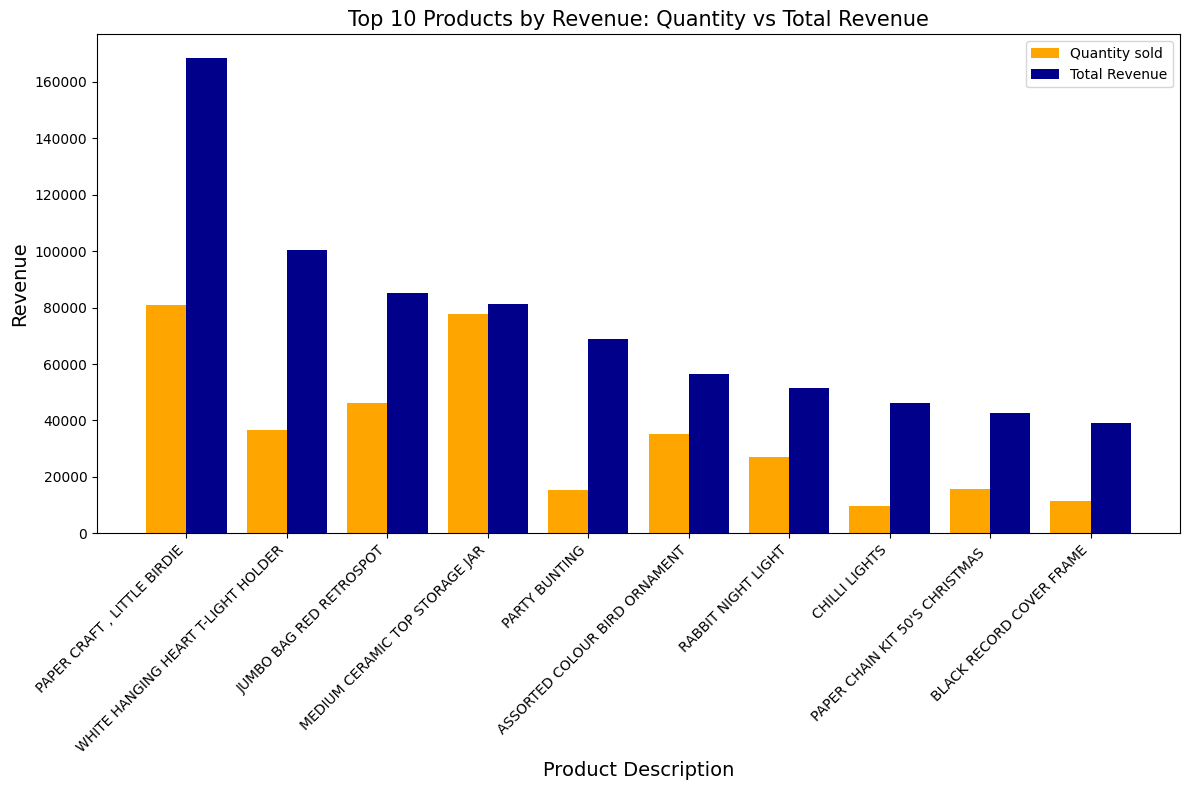

In [90]:
prod_group = df.groupby('Description')[['Quantity','TotalPrice']].sum()
Top_prod = prod_group.sort_values('TotalPrice',ascending=False).head(10)

x = np.arange(len(Top_prod))
w = 0.4

plt.figure(figsize=(12,8))
plt.bar(x - w/2,Top_prod['Quantity'],w,label="Quantity sold",color='orange')
plt.bar(x + w/2,Top_prod['TotalPrice'],w,label='Total Revenue',color='darkblue')
plt.xlabel('Product Description',fontsize=14)
plt.ylabel('Revenue',fontsize=14)
plt.title('Top 10 Products by Revenue: Quantity vs Total Revenue', fontsize=15)
plt.xticks(x,Top_prod.index,rotation=45,ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# MONTHLY REVENUE TREND

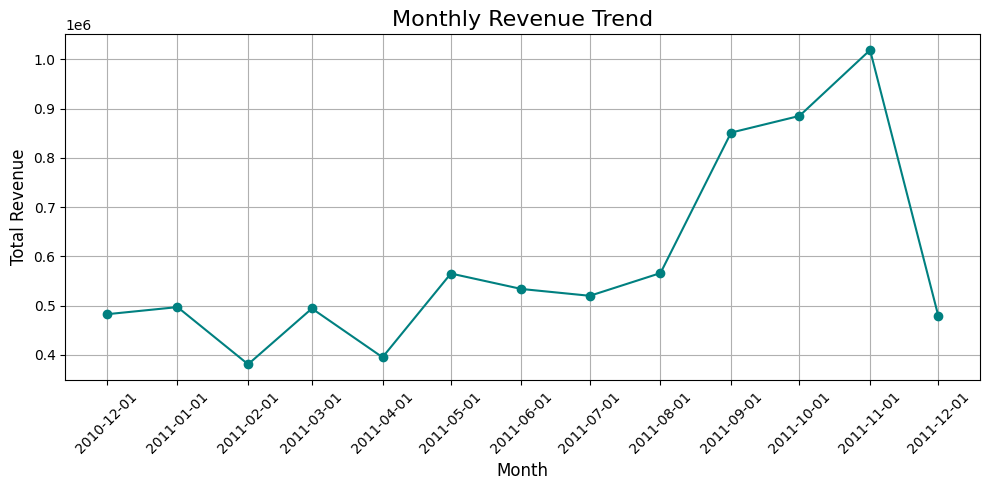

In [91]:
monthly_revenue = df.groupby('Month')['TotalPrice'].sum()
monthly_revenue.index = monthly_revenue.index.to_timestamp()

plt.figure(figsize=(10,5))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o', color='teal')
plt.title('Monthly Revenue Trend', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.grid(True)
plt.xticks(monthly_revenue.index,rotation=45)
plt.tight_layout()
plt.show()

# RFM ANALYSIS


In [ ]:
# RECENCY : It tells how recently the customer made the purchase
# FREQUENCY : How many times the coustomer the purchase
# MONETARY : Total money spent

In [7]:
# RECENCY
# Last invoice date
ref_date = df['InvoiceDate'].max()

# Customer's last purchase date
last_purchase = df.groupby('CustomerID')['InvoiceDate'].max()

# Calculating Recency
recency = (ref_date - last_purchase).dt.days
recency_df = recency.reset_index().rename(columns={'InvoiceDate': 'Recency'})

In [9]:
# FREQUENCY
no_of_purchases = df.groupby('CustomerID')['InvoiceNo'].nunique()
frequency_df = no_of_purchases.reset_index().rename(columns={'InvoiceNo':'Frequency'})

In [10]:
# MONETARY VALUE
monetary = df.groupby('CustomerID')['TotalPrice'].sum()
monetary_df = monetary.reset_index().rename(columns={'TotalPrice': 'Monetary'})

# MERGING R , F , M 

In [11]:
rfm = recency_df.merge(frequency_df,on='CustomerID').merge(monetary_df,on='CustomerID')

# RFM SCORING

In [12]:
# RECENCY SCORE
rfm['Rec_score'] = pd.qcut(rfm['Recency'],5,labels=[5,4,3,2,1])

# FREQUENCY SCORE
rfm['Frq_score'] = pd.qcut(rfm['Frequency'].rank(method='first'),5,labels=[1,2,3,4,5])

# MONETARY SCORE
rfm['Mon_score'] = pd.qcut(rfm['Monetary'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])

# Combining all
rfm['RFM_Score'] = rfm['Rec_score'].astype(str) + rfm['Frq_score'].astype(str) + rfm['Mon_score'].astype(str)
rfm.head(20)

,CustomerID,Recency,Frequency,Monetary,Rec_score,Frq_score,Mon_score,RFM_Score
0,12346.0,325,1,77183.60,1,1,5,115
1,12347.0,1,7,3981.15,5,5,5,555
2,12348.0,74,4,1437.24,2,4,4,244
3,12349.0,18,1,1089.15,4,1,4,414
4,12350.0,309,1,294.40,1,1,2,112
5,12352.0,35,7,1130.94,3,5,4,354
6,12353.0,203,1,29.30,1,1,1,111
7,12354.0,231,1,845.25,1,1,4,114
8,12355.0,213,1,414.00,1,1,3,113
9,12356.0,245,2,1911.40,1,2,5,125


# TOP CUSTOMER PERFORMANCES

C:\Users\HP\AppData\Local\Temp\ipykernel_16380\4197563103.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  rfm_pivot = rfm.pivot_table(index='Frq_score',columns='Rec_score',values='Mon_score',aggfunc='mean')


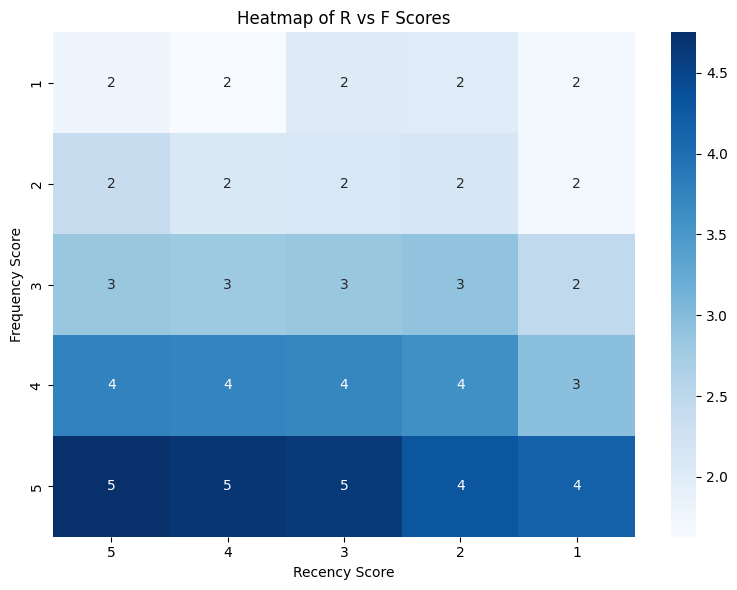

In [22]:
rfm['Mon_score'] = pd.to_numeric(rfm['Mon_score'],errors='coerce')

rfm_pivot = rfm.pivot_table(index='Frq_score',columns='Rec_score',values='Mon_score',aggfunc='mean')
plt.figure(figsize=(8,6))
sns.heatmap(rfm_pivot,annot=True,fmt='.0f',cmap='Blues')
plt.title('Heatmap of R vs F Scores')
plt.xlabel('Recency Score')
plt.ylabel('Frequency Score')
plt.tight_layout()
plt.show()

# RANKING CUSTOMERS

In [16]:
def assign_segment(r,f,m):
    
    if r>=4 and m>=4:
        return 'Champion'
    elif r>=4 and f>=3:
        return 'Loyal'
    elif r>=3 and f<=2:
        return 'Recent Customers'
    elif r<=2 and f>=4:
        return 'At Risk'
    elif r==1 and f==1 and m==1:
        return 'Lost'
    else:
        return 'Others'
    
 

rfm['Segment'] = rfm.apply(lambda row: assign_segment(row['Rec_score'],row['Frq_score'],row['Mon_score']), axis=1)   

# 2*2 DASHBOARD

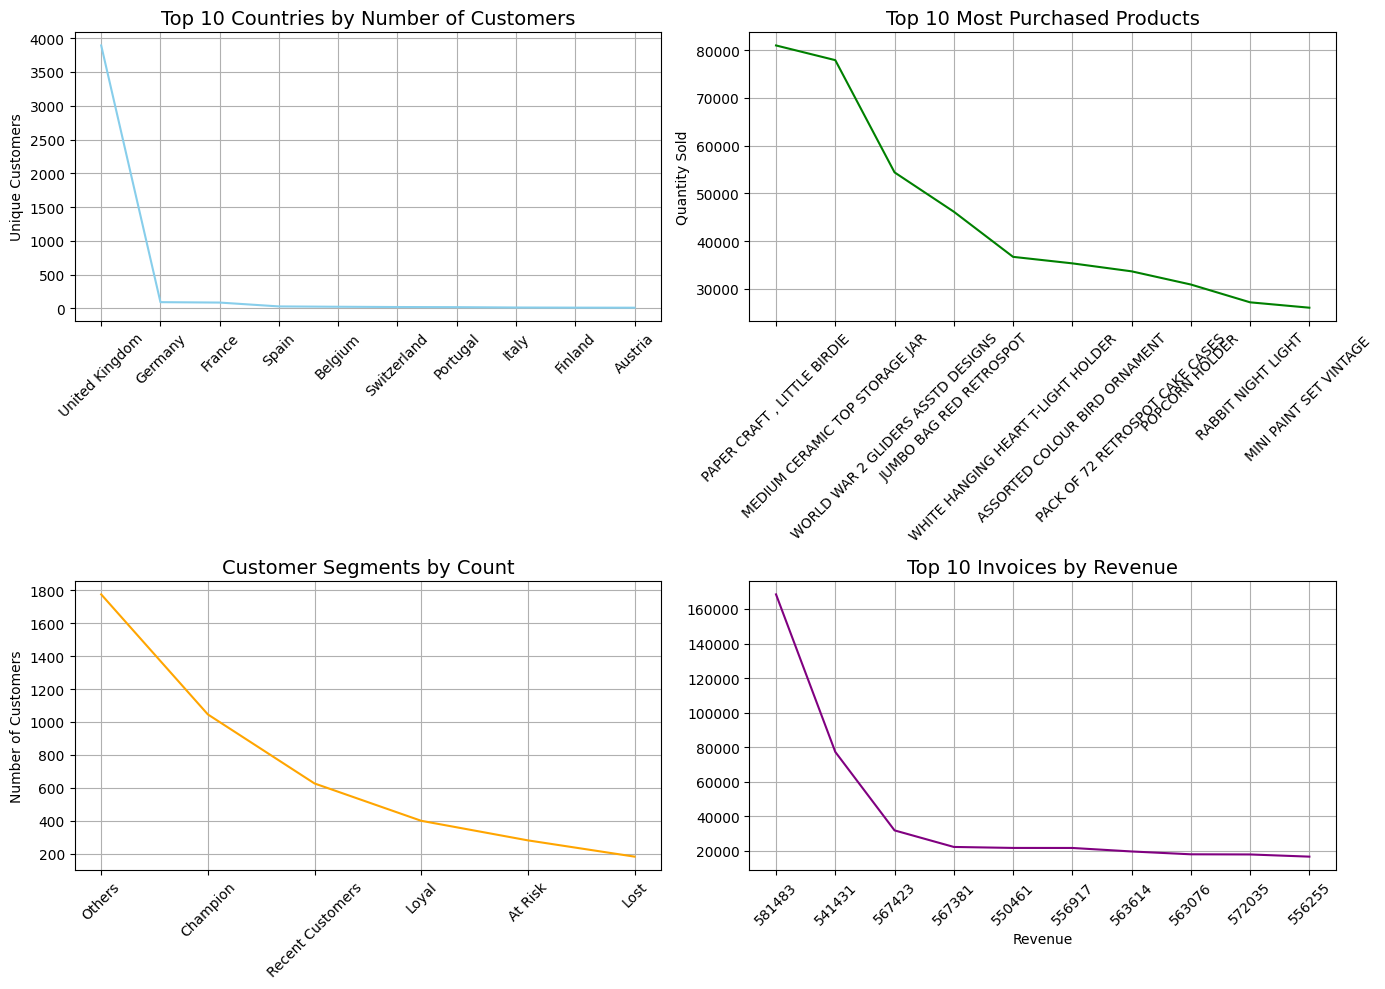

In [21]:
fig, axes = plt.subplots(2,2,figsize=(14,10))

#1 Top 10 countries by number of customers
country_count = df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False).head(10)
axes[0,0].plot(country_count.index,country_count.values,color='skyblue')
axes[0,0].set_title('Top 10 Countries by Number of Customers', fontsize=14)
axes[0,0].set_ylabel('Unique Customers')


#2 Top 10 most purchased products
top_prod = df.groupby('Description')['Quantity'].sum().sort_values(ascending = False).head(10)
axes[0, 1].plot(top_prod.index, top_prod.values, color='green')
axes[0, 1].set_title('Top 10 Most Purchased Products', fontsize=14)
axes[0, 1].set_ylabel('Quantity Sold')

#3 Customer segments by count
seg_counts = rfm['Segment'].value_counts()
axes[1, 0].plot(seg_counts.index, seg_counts.values, color='orange')
axes[1, 0].set_title('Customer Segments by Count', fontsize=14)
axes[1, 0].set_ylabel('Number of Customers')

#4
invoice_rev = df.groupby('InvoiceNo')['TotalPrice'].sum().sort_values(ascending=False).head(10)
axes[1, 1].plot(invoice_rev.index.astype(str), invoice_rev.values, color='purple')
axes[1, 1].set_title('Top 10 Invoices by Revenue', fontsize=14)
axes[1, 1].set_xlabel('Revenue')


# Top 10 inovices by revenue
for ax in axes.flat:
    ax.grid(True)
    ax.tick_params(axis='x',rotation=45)
    

plt.tight_layout()
plt.show()